In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf

In [2]:
print("test")

test


In [3]:
import mlfinlab

In [5]:
# from mlfinlab.data_structures_snapshot_tick.imbalance_data_structures import get_ema_tick_imbalance_bars, \
#     get_ema_volume_imbalance_bars
# from mlfinlab.data_structures_snapshot_tick.run_data_structures import get_ema_tick_run_bars, \
#     get_ema_volume_run_bars

In [6]:
dir(mlfinlab)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'backtest_statistics',
 'backtests',
 'bet_sizing',
 'clustering',
 'codependence',
 'cross_validation',
 'data_structures',
 'datasets',
 'ensemble',
 'feature_importance',
 'filters',
 'fracdiff',
 'labeling',
 'microstructural_features',
 'multi_product',
 'online_portfolio_selection',
 'portfolio_optimization',
 'sample_weights',
 'sampling',
 'structural_breaks',
 'util']

In [7]:
dir(mlfinlab.data_structures)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base_bars',
 'get_const_dollar_imbalance_bars',
 'get_const_dollar_run_bars',
 'get_const_tick_imbalance_bars',
 'get_const_tick_run_bars',
 'get_const_volume_imbalance_bars',
 'get_const_volume_run_bars',
 'get_dollar_bars',
 'get_ema_dollar_imbalance_bars',
 'get_ema_dollar_run_bars',
 'get_ema_tick_imbalance_bars',
 'get_ema_tick_run_bars',
 'get_ema_volume_imbalance_bars',
 'get_ema_volume_run_bars',
 'get_tick_bars',
 'get_time_bars',
 'get_volume_bars',
 'imbalance_data_structures',
 'run_data_structures',
 'standard_data_structures',
 'time_data_structures']

In [8]:
from mlfinlab.data_structures.imbalance_data_structures import get_ema_tick_imbalance_bars, \
    get_ema_volume_imbalance_bars


In [9]:
from mlfinlab.data_structures.run_data_structures import get_ema_tick_run_bars, \
    get_ema_volume_run_bars

In [10]:
def get_data_df(df_path):
    df = pd.read_csv(df_path)
    notnan_cond = ~df.Volume.isnull()
    df = df[notnan_cond].copy()
    d_list = df["Date[L]"]
    t_list = df["Time[L]"]
    dt_list = [d+" "+t for d,t in zip(d_list, t_list)]
    dtt_list = pd.to_datetime(dt_list, format='%d-%b-%Y %H:%M:%S.%f')
    df["date_time"] = dtt_list
    df.set_index('date_time', inplace=True)
    return df[["Price", "Volume"]].rename(columns={'Price': 'price', 'Volume': 'volume'})


In [ ]:
# df_path = "INDICES200601-20081231-N105804263-part001_head.csv"
df_path = "INDICES200601-20081231-N105804263-part001.csv"
tick_df = get_data_df(df_path)

In [12]:
print(tick_df.shape)
print(tick_df.head())

(99740, 2)
                               price      volume
date_time                                       
2006-01-03 10:00:17.037121  14843.97         0.0
2006-01-03 10:00:17.339836  14843.97  19649233.0
2006-01-03 10:00:31.900701  14850.92  19649233.0
2006-01-03 10:00:32.101860  14850.92  19868433.0
2006-01-03 10:00:47.771052  14846.30  19868433.0


In [13]:
def generate_time_bars(df):
    return pd.DataFrame(df['price'].resample('5min').ohlc().dropna())

In [14]:
time_bars = generate_time_bars(tick_df)

<AxesSubplot: xlabel='date_time'>

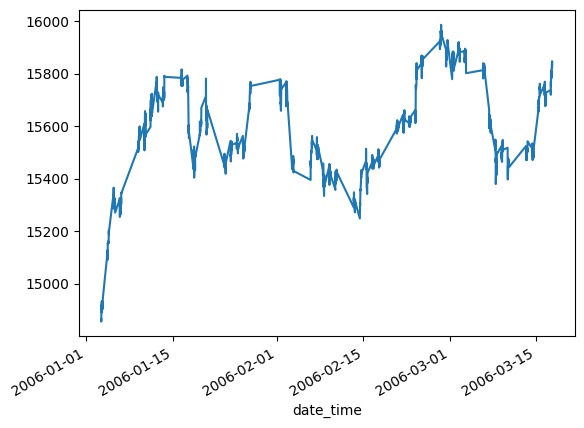

In [15]:
time_bars['close'].plot()

In [16]:
tick_df

,price,volume
date_time,,
2006-01-03 10:00:17.037121,14843.97,0.0
2006-01-03 10:00:17.339836,14843.97,19649233.0
2006-01-03 10:00:31.900701,14850.92,19649233.0
2006-01-03 10:00:32.101860,14850.92,19868433.0
2006-01-03 10:00:47.771052,14846.30,19868433.0
...,...,...
2006-03-17 15:48:18.421479,15845.78,362618701.0
2006-03-17 15:48:18.725170,15845.78,364509868.0
2006-03-17 15:48:33.476453,15842.87,364509868.0


In [37]:
tick_df

,price,volume
date_time,,
2006-01-03 10:00:17.037121,14843.97,0.0
2006-01-03 10:00:17.339836,14843.97,19649233.0
2006-01-03 10:00:31.900701,14850.92,19649233.0
2006-01-03 10:00:32.101860,14850.92,19868433.0
2006-01-03 10:00:47.771052,14846.30,19868433.0
...,...,...
2006-03-17 15:48:18.421479,15845.78,362618701.0
2006-03-17 15:48:18.725170,15845.78,364509868.0
2006-03-17 15:48:33.476453,15842.87,364509868.0


In [32]:
ret = get_ema_tick_imbalance_bars(tick_df.reset_index(), analyse_thresholds=True,
                                 exp_num_ticks_constraints=[800, 80000])

Reading data in batches:
Batch number: 0
Returning bars 



In [35]:
# ret[0]tick_numが69062なのでret[1]の69062から一回かわっているだけ
ret[0]

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2006-02-23 15:53:33.486578,69062,14843.97,15849.86,14843.97,15808.78,1.570169e+13,7.919485e+12,69062,2.438276e+17


In [36]:
ret[1]

,cum_theta,expected_imbalance,exp_num_ticks,timestamp
0,0.0,NaN,20000.0,2006-01-03 10:00:17.037121
1,0.0,NaN,20000.0,2006-01-03 10:00:17.339836
2,1.0,NaN,20000.0,2006-01-03 10:00:31.900701
3,2.0,NaN,20000.0,2006-01-03 10:00:32.101860
4,1.0,NaN,20000.0,2006-01-03 10:00:47.771052
...,...,...,...,...
99735,322.0,0.025694,69062.0,2006-03-17 15:48:18.421479
99736,323.0,0.025694,69062.0,2006-03-17 15:48:18.725170
99737,322.0,0.025694,69062.0,2006-03-17 15:48:33.476453
99738,321.0,0.025694,69062.0,2006-03-17 15:48:33.981303


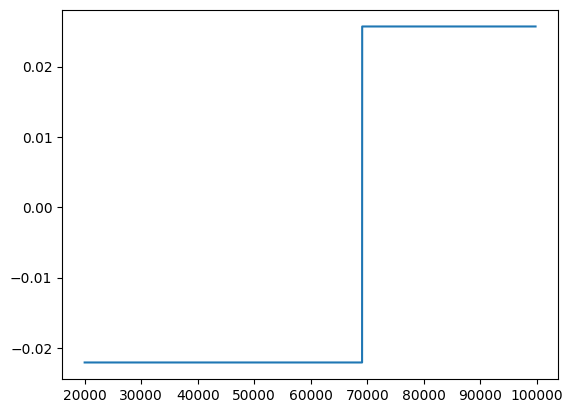

In [39]:
plt.plot(ret[1].expected_imbalance)

In [40]:
ret = get_ema_tick_imbalance_bars(tick_df.reset_index(), analyse_thresholds=True,
                                 exp_num_ticks_constraints=[80, 80000], expected_imbalance_window=1000, exp_num_ticks_init=2000)


Reading data in batches:
Batch number: 0
Returning bars 



In [41]:
ret[0]

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2006-01-04 10:10:17.510979,2000,14843.97,15135.10,14843.97,15135.10,2.220212e+11,1.137270e+11,2000,3.313234e+15
1,2006-01-04 10:16:47.561537,2052,15135.10,15135.45,15106.72,15108.12,4.201256e+09,1.685548e+09,52,6.352545e+13
2,2006-01-04 10:26:17.861092,2129,15108.12,15110.61,15090.61,15091.18,7.692060e+09,2.969066e+09,77,1.161365e+14
3,2006-01-04 10:46:47.826685,2293,15085.49,15110.20,15085.44,15107.98,1.992353e+10,1.122219e+10,164,3.008839e+14
4,2006-01-04 10:47:02.525236,2294,15108.92,15108.92,15108.92,15108.92,1.341851e+08,1.341851e+08,1,2.027392e+12
...,...,...,...,...,...,...,...,...,...,...
9496,2006-01-26 15:50:34.501907,34480,15513.55,15517.30,15492.19,15510.32,6.205883e+10,3.399899e+10,207,9.624242e+14
9497,2006-01-27 14:30:32.890934,35760,15510.32,15742.26,15500.53,15742.26,4.955122e+11,2.546944e+11,1280,7.765374e+15
9498,2006-02-01 15:33:18.464111,38183,15742.26,15808.18,15653.90,15741.08,9.218894e+11,4.735307e+11,2423,1.450840e+16
9499,2006-02-07 10:22:02.587334,44331,15743.07,15775.65,15374.89,15519.63,1.647222e+12,8.514377e+11,6148,2.563833e+16


In [42]:
ret[1]

,cum_theta,expected_imbalance,exp_num_ticks,timestamp
0,0.0,NaN,2000.000000,2006-01-03 10:00:17.037121
1,0.0,NaN,2000.000000,2006-01-03 10:00:17.339836
2,1.0,NaN,2000.000000,2006-01-03 10:00:31.900701
3,2.0,NaN,2000.000000,2006-01-03 10:00:32.101860
4,1.0,NaN,2000.000000,2006-01-03 10:00:47.771052
...,...,...,...,...
99735,200.0,0.144712,29712.428571,2006-03-17 15:48:18.421479
99736,201.0,0.144712,29712.428571,2006-03-17 15:48:18.725170
99737,200.0,0.144712,29712.428571,2006-03-17 15:48:33.476453
99738,199.0,0.144712,29712.428571,2006-03-17 15:48:33.981303


In [52]:
# # tick_df
# plt.plot(ret[1].timestamp, ret[1].cum_theta/1000)

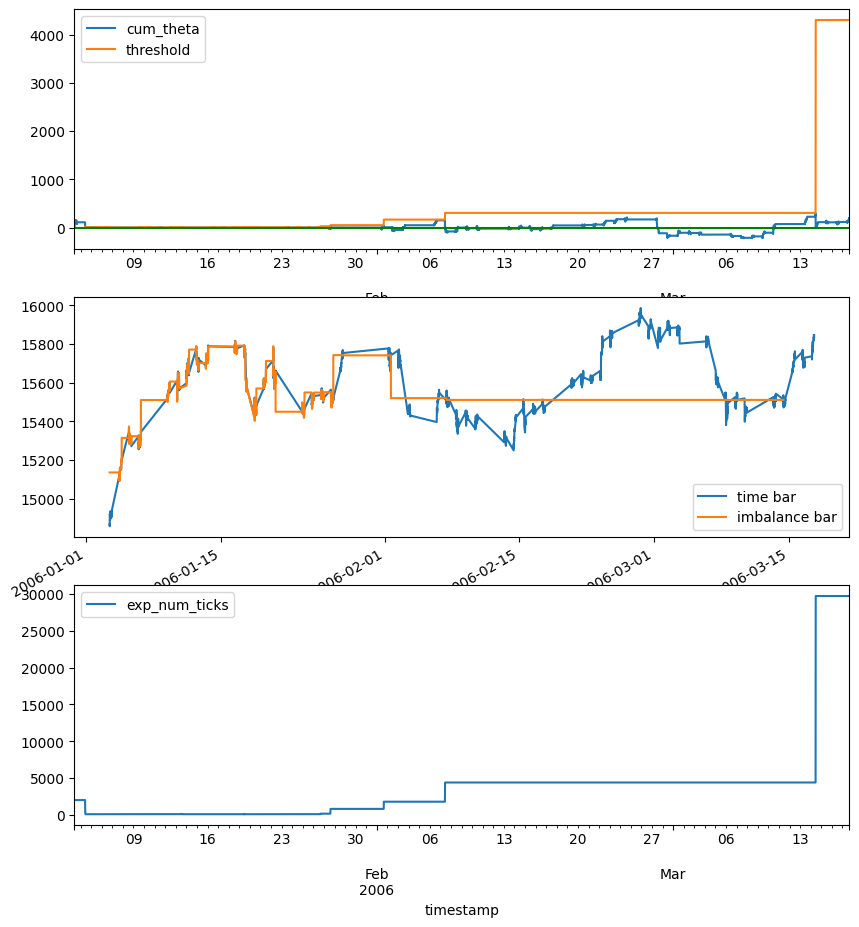

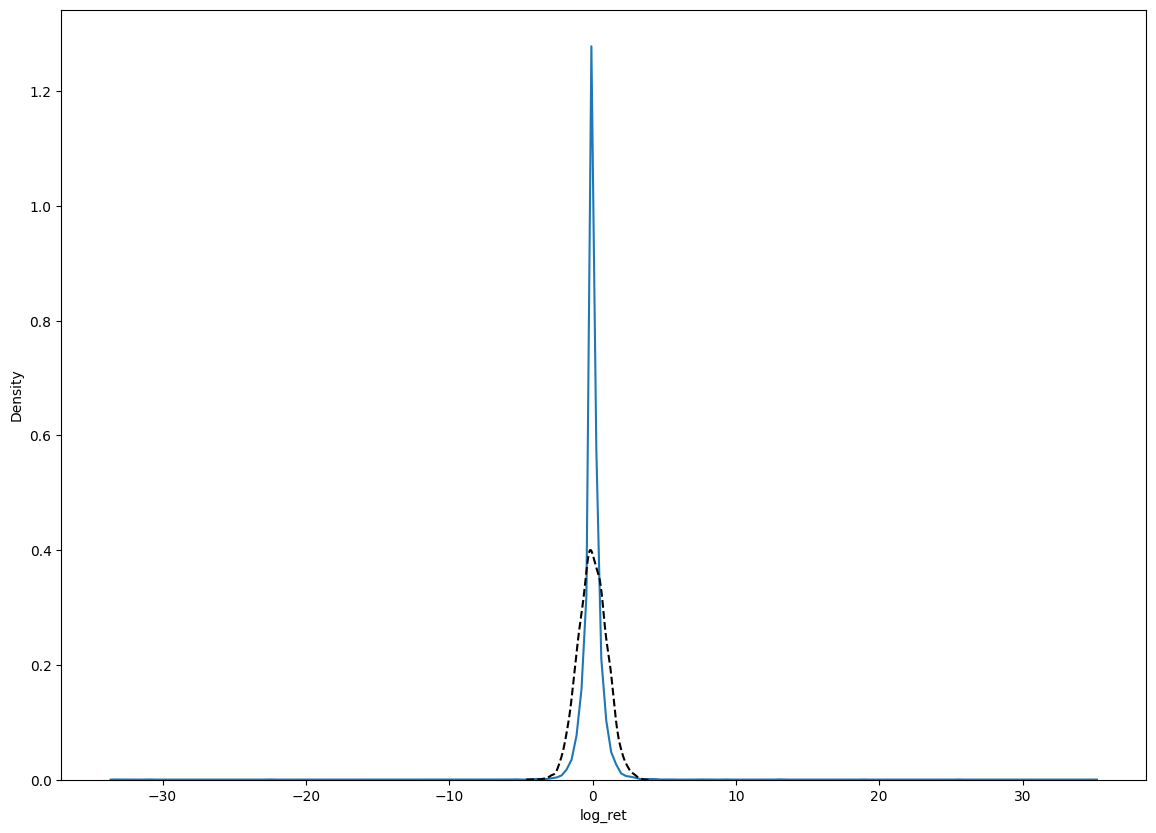

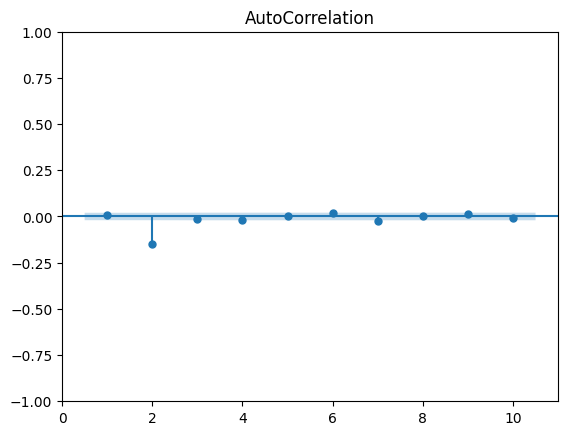

In [55]:
analysis_thresholds(ret[0], ret[1])

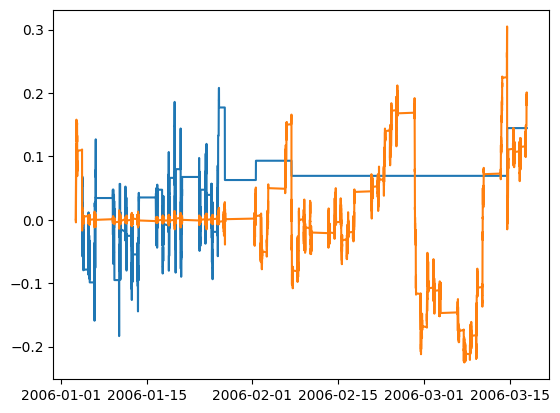

In [49]:
plt.plot(ret[1].timestamp, ret[1].expected_imbalance)
plt.plot(ret[1].timestamp, ret[1].cum_theta/1000)

In [51]:
# plt.plot(ret[1].timestamp, np.abs(ret[1].expected_imbalance))
# plt.plot(ret[1].timestamp, np.abs(ret[1].cum_theta/1000))

In [20]:
! ls

bars2.ipynb	    INDICES200601-20081231-N105804263-part001.csv
bars_fx.ipynb	    INDICES200601-20081231-N105804263-part001_head.csv
bars.ipynb	    information_driven_bars.py
chap2.ipynb	    mlfinlab
compare_bars.ipynb  mlfinlab_bars.ipynb
FDUA		    README.md
FinDataChallenge    requirements.txt
hoge.csv	    temp.csv
hogehoge.py


In [21]:
! head hoge.csv

date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
2006-02-23 15:53:33.486578,69062,14843.97,15849.86,14843.97,15808.78,15701688142327.0,7919485389283.0,69062,2.4382759724375478e+17


In [54]:
def analysis_thresholds(imb_bars:pd.DataFrame, thresholds_df):
    thresholds_df['threshold'] = np.abs(thresholds_df['expected_imbalance']*thresholds_df['exp_num_ticks'])
    if 'timestamp' in thresholds_df.columns:
        thresholds_df.set_index('timestamp', inplace=True)

#     print(thresholds_df)
    
    thresholds_df_down_sample = thresholds_df.resample("5min").bfill()
    
    plt.figure(figsize=(10,12))
    ax1 = plt.subplot(311)

    thresholds_df_down_sample[['cum_theta', 'threshold']].plot(ax=ax1)
    plt.axhline(0, c='green')

    ax2 = plt.subplot(312)
    time_bars['close'].plot(ax=ax2, label='time bar')
    time_bars['imb_close'] = np.NaN
    
    last_time = None
    for row in imb_bars[['date_time', 'close']].itertuples():
        if last_time is None:
            time_bars['imb_close'].loc[time_bars.index<=row.date_time] = row.close
        else:
            time_bars['imb_close'].loc[(time_bars.index>last_time) & (time_bars.index<=row.date_time)] = row.close
        last_time = row.date_time
    time_bars['imb_close'].plot(ax=ax2, label='imbalance bar')
    plt.legend()

    ax3 = plt.subplot(313)
    thresholds_df_down_sample[['exp_num_ticks']].plot(ax=ax3)

    plt.show()
    
    imb_bars['log_ret'] = np.log(imb_bars['close']).diff().dropna()
    plt.figure(figsize=(14,10))
    sns.kdeplot((imb_bars.log_ret - imb_bars.log_ret.mean()) / imb_bars.log_ret.std(), label="Imbalance bars")
    sns.kdeplot(np.random.normal(size=len(imb_bars)), label="Normal", color='black', linestyle="--")
    plt.show()
    
    plot_acf(imb_bars['log_ret'].dropna(), lags=10, zero=False)
    plt.title('AutoCorrelation')
    plt.show()